In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.decomposition import NMF, PCA
from sklearn.preprocessing import Normalizer, MaxAbsScaler, StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline

In [2]:
# Load the files:
cust_features = pd.read_csv('./customer_features.csv')
cust_labels = pd.read_csv('./customer_labels.csv')
cust_id = pd.read_csv('./customer_id.csv')

In [3]:
cust_features.drop(columns = 'Unnamed: 0', inplace = True)
cust_labels.drop(columns = 'Unnamed: 0', inplace = True)

In [4]:
# Best columns to keep.
#best_cols = ['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_TITEL',
#             'CAMEO_DEUG_2015', 'CJT_GESAMTTYP', 'D19_BANKEN_ANZ_12', 'D19_BANKEN_ANZ_24', 'D19_BANKEN_DATUM',
#             'D19_BANKEN_OFFLINE_DATUM', 'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ONLINE_QUOTE_12', 'D19_GESAMT_ANZ_12',
#             'D19_GESAMT_ANZ_24', 'D19_GESAMT_DATUM', 'D19_GESAMT_OFFLINE_DATUM', 'D19_GESAMT_ONLINE_DATUM',
#             'D19_GESAMT_ONLINE_QUOTE_12', 'D19_KONSUMTYP', 'D19_TELKO_ANZ_12', 'D19_TELKO_ANZ_24', 'D19_TELKO_DATUM',
#             'D19_TELKO_OFFLINE_DATUM', 'D19_TELKO_ONLINE_DATUM', 'D19_VERSAND_ANZ_12', 'D19_VERSAND_ANZ_24', 'D19_VERSAND_DATUM',
#             'D19_VERSAND_OFFLINE_DATUM', 'D19_VERSAND_ONLINE_DATUM', 'D19_VERSAND_ONLINE_QUOTE_12', 'D19_VERSI_ANZ_12',
#             'D19_VERSI_ANZ_24', 'EWDICHTE', 'FINANZTYP', 'FINANZ_ANLEGER', 'FINANZ_MINIMALIST', 'FINANZ_SPARER',
#             'FINANZ_UNAUFFAELLIGER', 'FINANZ_VORSORGER', 'GEBAEUDETYP', 'GEBAEUDETYP_RASTER', 'GEBURTSJAHR',
#             'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'HH_EINKOMMEN_SCORE', 'KBA05_ALTER4', 'KBA05_ANTG2', 'KBA05_ANTG4',
#             'KBA05_CCM3', 'KBA05_CCM4', 'KBA05_DIESEL', 'KBA05_FRAU', 'KBA05_HERST1', 'KBA05_HERST2', 'KBA05_KRSAQUOT',
#             'KBA05_KRSHERST1', 'KBA05_KRSHERST2', 'KBA05_KRSZUL', 'KBA05_KW2', 'KBA05_KW3', 'KBA05_MAXAH', 'KBA05_MAXBJ',
#             'KBA05_MAXSEG', 'KBA05_MOD1', 'KBA05_MOD3', 'KBA05_MOD8', 'KBA05_MOTOR', 'KBA05_SEG10', 'KBA05_SEG4', 'KBA05_SEG5',
#             'KBA05_SEG6', 'KBA05_SEG7', 'KBA05_SEG8', 'KBA05_VORB0', 'KBA05_ZUL1', 'KBA05_ZUL2', 'KBA05_ZUL4',
#             'KBA13_ALTERHALTER_45', 'KBA13_ALTERHALTER_61', 'KBA13_ANZAHL_PKW', 'KBA13_AUDI', 'KBA13_BMW', 'KBA13_CCM_1500',
#             'KBA13_CCM_2000', 'KBA13_CCM_2500', 'KBA13_CCM_2501', 'KBA13_CCM_3000', 'KBA13_CCM_3001', 'KBA13_FIAT',
#             'KBA13_HALTER_40', 'KBA13_HALTER_45', 'KBA13_HALTER_55', 'KBA13_HALTER_65', 'KBA13_HALTER_66',
#             'KBA13_HERST_AUDI_VW', 'KBA13_HERST_BMW_BENZ', 'KBA13_HERST_EUROPA', 'KBA13_HERST_FORD_OPEL', 'KBA13_KMH_140',
#             'KBA13_KMH_211', 'KBA13_KMH_250', 'KBA13_KMH_251', 'KBA13_KRSHERST_AUDI_VW', 'KBA13_KRSHERST_BMW_BENZ',
#             'KBA13_KRSZUL_NEU', 'KBA13_KW_121', 'KBA13_MERCEDES', 'KBA13_MOTOR', 'KBA13_OPEL', 'KBA13_PEUGEOT',
#             'KBA13_SEG_GROSSRAUMVANS', 'KBA13_SEG_MINIVANS', 'KBA13_SEG_MINIWAGEN', 'KBA13_SEG_OBEREMITTELKLASSE',
#             'KBA13_SEG_OBERKLASSE', 'KBA13_SEG_SPORTWAGEN', 'KBA13_SEG_UTILITIES', 'KBA13_SEG_VAN', 'KBA13_SITZE_4',
#             'KBA13_SITZE_5', 'KBA13_SITZE_6', 'KBA13_VORB_0', 'KBA13_VW', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB',
#             'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'MIN_GEBAEUDEJAHR',
#             'ONLINE_AFFINITAET', 'ORTSGR_KLS9', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_BAUMAX',
#             'PLZ8_GBZ', 'PLZ8_HHZ', 'PRAEGENDE_JUGENDJAHRE', 'RELAT_AB', 'RETOURTYP_BK_S', 'SEMIO_DOM', 'SEMIO_ERL',
#             'SEMIO_FAM', 'SEMIO_KAEM', 'SEMIO_KRIT', 'SEMIO_KULT', 'SEMIO_LUST', 'SEMIO_PFLICHT', 'SEMIO_RAT',
#             'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_VERT', 'SHOPPER_TYP', 'VERS_TYP', 'WOHNDAUER_2008', 'W_KEIT_KIND_HH',
#             'ZABEOTYP', 'CAMEO_DEU_2015_2D', 'CAMEO_DEU_2015_5D', 'CAMEO_DEU_2015_6B', 'CAMEO_DEU_2015_7B',
#             'CAMEO_DEU_2015_7C', 'CAMEO_DEU_2015_9E', 'OST_WEST_KZ_W']

In [5]:
#cust_features = cust_features[best_cols]

In [6]:
cust_features.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEUG_2015,CAMEO_DEU_2015,CJT_GESAMTTYP,...,SEMIO_REL,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,VERS_TYP,WOHNDAUER_2008,WOHNLAGE,W_KEIT_KIND_HH,ZABEOTYP
0,4,1,1.0,0.0,2.0,0.0,3.0,1.0,1A,5.0,...,2,6,1,6,3.0,1.0,9.0,7.0,6.0,3
1,4,1,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,...,2,3,1,7,3.0,1.0,9.0,NaN,NaN,3
2,4,2,1.0,0.0,1.0,0.0,7.0,5.0,5D,2.0,...,1,2,1,3,1.0,2.0,9.0,2.0,6.0,3
3,4,1,0.0,NaN,0.0,0.0,7.0,4.0,4C,2.0,...,3,6,4,7,0.0,1.0,9.0,7.0,NaN,1
4,3,1,7.0,0.0,4.0,0.0,3.0,7.0,7B,6.0,...,4,4,4,5,1.0,2.0,9.0,3.0,2.0,1


In [7]:
# Create dummy columns from the categorical data.
def create_dummy_df(df, cat_cols, dummy_na=False):
    '''
    Function finds all categorical columns, creats dummy variables and deletes the original.
    
    Inputs:
        df - dataframe to use.
        cat_cols - a list of the categorical column in the dataframe.
        dummy_na - Set to false.
        
    Output:
       df - dataframe with the categorical columns replaced with their dummy variables.
    '''
    for col in cat_cols:
        try:
            # for eact category add a dummy variable and drop the original colunn.
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
            
        except:
            continue
    return df

In [8]:
cat_df = cust_features.select_dtypes(include='object')
cat_cols = cat_df.columns

# Create the dummy variables from the categorical columns in df.
cust_data_dum = create_dummy_df(cust_features, cat_cols, dummy_na=False)

In [9]:
imputer = SimpleImputer(strategy='most_frequent')
cust_features_im = pd.DataFrame(imputer.fit_transform(cust_data_dum.values),
                                columns = cust_data_dum.columns)

In [10]:
# Population data.
pop_features = pd.read_csv('./population_features.csv')
pop_lrn = pd.read_csv('./population_lrn.csv')

In [11]:
# Lest keep the best of the columns.
#pop_features = pop_features[best_cols]

In [12]:
pop_features.drop(columns = 'Unnamed: 0', inplace = True)

In [13]:
pop_cat_df = pop_features.select_dtypes(include='object')
pop_cat_cols = pop_cat_df.columns

# Once again for the population data lets get those dummies.
pop_data_dum = create_dummy_df(pop_features, pop_cat_cols, dummy_na=False)

In [14]:
pop_features_im = pd.DataFrame(imputer.fit_transform(pop_data_dum.values),
                              columns = pop_data_dum.columns)

In [15]:
# A look at the data earlier showed that some of the features
# have a big range and thus should be scaled.

scaler = RobustScaler()
scaled_pop = pd.DataFrame(scaler.fit_transform(pop_features_im),
                          columns=pop_features_im.columns)

In [16]:
scaled_cust = pd.DataFrame(scaler.fit_transform(cust_features_im),
                           columns=cust_features_im.columns)

### Performing Dimentinality Reduction using PCA.
Here we find out the vectors of the maximal variance in this data.

In [17]:
pca = PCA()
pop_pca = pca.fit_transform(scaled_pop)

In [18]:
def pca_plot(pca):
    '''
    Creates a scree plot associated with the principal components
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(20, 10))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]),
                    va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    plt.grid()

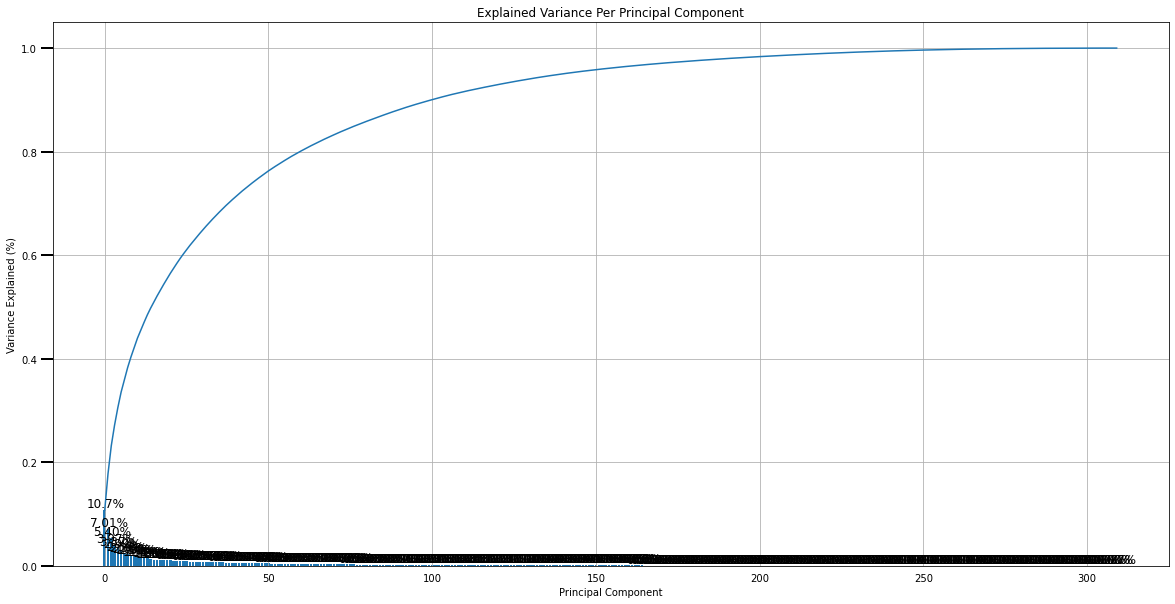

In [19]:
# Investigate the variance accounted for by each principal component.
pca_plot(pca)

#### It looks like 200 PCA components explains ~97% of the data.

In [20]:
pca = PCA(n_components=200)
pop_pca = pca.fit_transform(scaled_pop)

In [21]:
cust_pca = pca.transform(scaled_cust)

In [22]:
scaled_pop.shape

(891221, 310)

In [23]:
scaled_cust.shape

(191652, 310)

In [24]:
#odd_one_out = []
#for x in scaled_pop.columns:
#    if x not in scaled_cust.columns:
#        odd_one_out.append(x)#

#odd_one_out

### Clustering the data.

In [25]:
from sklearn.cluster import KMeans

In [26]:
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    # instantiate kmeans
    kmeans = KMeans(n_clusters=center, random_state=42)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

In [27]:
# Using the elbow method
scores = []
centroid = np.arange(2, 15, 1)

for i in centroid:
    scores.append(get_kmeans_score(pop_pca, i))

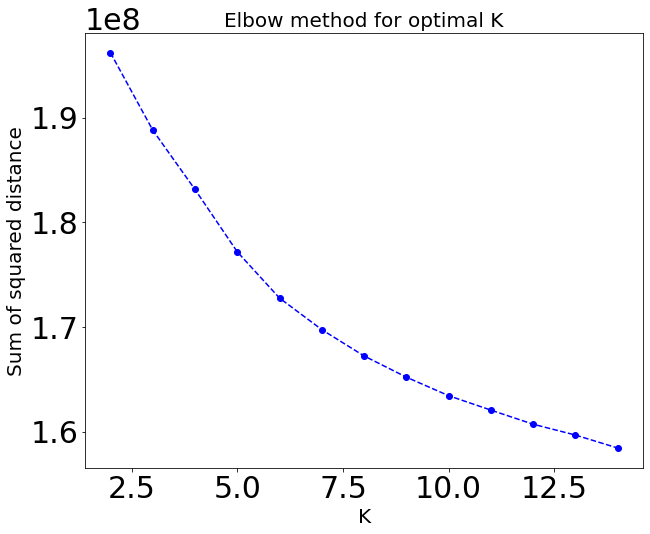

In [34]:
# Investigate the change in within-cluster distance across number of clusters.

plt.figure(figsize=(10, 8)) 
plt.plot(centroid, scores, linestyle='--', marker='o', color='b');
plt.rc('xtick', labelsize=30)  
plt.rc('ytick', labelsize=30)
plt.xlabel('K', fontsize=20)
plt.ylabel('Sum of squared distance', fontsize=20)
plt.title('Elbow method for optimal K', fontsize=20)
plt.show()

Looking at the above the elbow look to be at k=7 indicating the optimal k for the dataset is 7.

In [40]:
# Fit the KMeans model with 7 clusters.
kmeans = KMeans(n_clusters=9, random_state=42)
pop_clust = kmeans.fit_predict(pop_pca)

In [41]:
clust_count = pd.Series(pop_clust).value_counts()

clust_pop = pd.DataFrame({'clusters': clust_count.index,
                         '% of data':100*clust_count.values/len(pop_clust)})
clust_pop['data'] = 'population'

clust_pop

,clusters,% of data,data
0,0,22.709631,population
1,8,15.828285,population
2,1,13.156557,population
3,6,10.972363,population
4,2,10.805401,population
5,5,9.262686,population
6,4,8.342039,population
7,3,4.877690,population
8,7,4.045349,population


Clustering the customer data.

In [42]:
cust_clust = kmeans.predict(cust_pca)

In [43]:
cust_clust_count = pd.Series(cust_clust).value_counts()

clust_cust = pd.DataFrame({'clusters': cust_clust_count.index,
                          '% of data': 100*cust_clust_count.values/len(cust_clust)})
clust_cust['data'] = 'customers'
clust_cust

,clusters,% of data,data
0,0,28.541314,customers
1,2,26.538205,customers
2,1,22.401019,customers
3,8,12.534177,customers
4,3,3.360257,customers
5,7,3.293991,customers
6,5,2.940225,customers
7,6,0.372028,customers
8,4,0.018784,customers


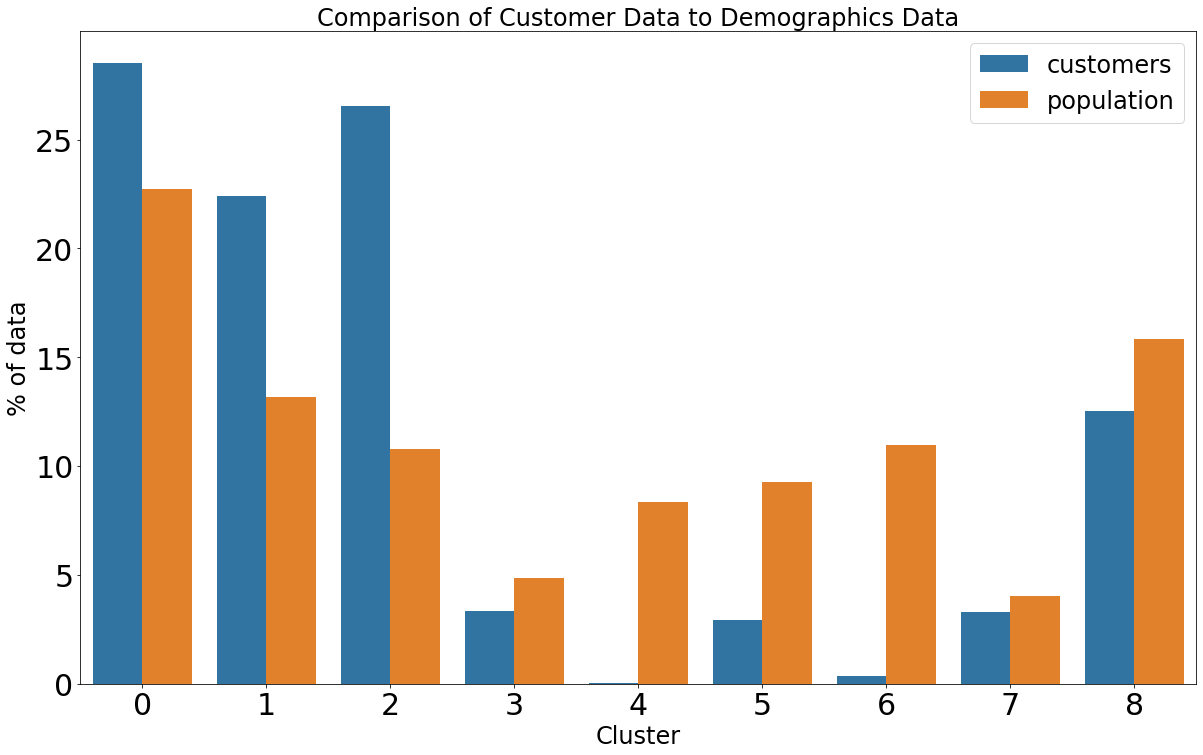

In [44]:
plt.figure(figsize=(20, 12))
sns.barplot(x="clusters", y="% of data", hue="data",
            data=pd.concat([clust_cust, clust_pop]))
plt.xlabel('Cluster', fontsize=24)
plt.ylabel('% of data', fontsize=24)
plt.title('Comparison of Customer Data to Demographics Data', fontsize=24)
plt.legend(fontsize=24)
plt.show()

### Conclusion
The cluster suggests that we should target clusters 0, 1, 2 and 8 for this campaign.  